# Market fires in Nigeria 2020

### Overview
The market fires dataset is study on some cases market fires in Nigeria around the year 2020.
There are about twenty columns present in this set that describe the name, location, cause and control of each fire outbreak. 
This analysis looks towards drawing conclusions on and raising possible solutions to market fires in Nigeria.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wranging

In [50]:
df = pd.read_csv('Market Fires Dataset.csv')

In [51]:
df.head(5)

,Identifier,Date of Fire,Market Name,Src,State,Region,Type of Market,LGA,Actual Start Location,Fire put out by,Reported Start Time,Reported Time Put Out,Fatalities,Looting,Reported Causes,Recurring?,When,Recurring src,Estimated Loss (N),Effective Use of Fire Extinguishers
0,NaN,31-Dec-19,Oja Bisi Market,https://www.voiceairmedia.com/2019/12/few-hour...,Ekiti State,South-West,General Goods,Ado Ekiti,Unspecified,Firefighters,NaN,NaN,Unknown,Unknown,Generator Fire,No,N/a,NaN,Undisclosed,NaN
1,NaN,01-Jan-20,Timber section Industrial Market Umuahia,https://punchng.com/fire-destroys-umuahia-indu...,Abia State,South-East,Timber Market,Umuahia,Timber Section,Firefighters,NaN,NaN,No,Unknown,NaN,Yes,29-Jan-10,https://allafrica.com/stories/201002030633.html,"10,000,000.00",NaN
2,NaN,03-Jan-20,Amassoma NDU Shopping complex,https://www.vanguardngr.com/2020/01/fire-destr...,Bayelsa State,South-South,Roadside Shops,Southern Ijaw LGA,Shopping complex,Traders,4:00 PM,NaN,No,Unknown,Refuse Fire,No,N/a,NaN,Undisclosed,NaN
3,NaN,03-Jan-20,Ogbete Market,https://www.vanguardngr.com/2020/01/breaking-f...,Enugu State,South-East,General Goods,Enugu North LG,Foam Shop,Firefighters,2:00 PM,NaN,No,No,Generator Fire,No,N/a,NaN,Undisclosed,Yes
4,NaN,05-Jan-20,Akesan Market,https://guardian.ng/news/traders-count-losses-...,Oyo State,South-West,General Goods,Oyo East LGA,Unspecified,Firefighters,12:30 AM,NaN,Yes,Yes,Unknown,No,N/a,NaN,"20,000,000,000.00",No


In [52]:
df.shape

(20, 20)

### Data Cleaning

#### Dropping useless column(s)

In [53]:
useless_column = ['Identifier','Reported Start Time','Reported Time Put Out']
df.drop(useless_column,1,inplace=True)

#### Changing index from 0 to 1

In [54]:
df.index = np.arange(1, len(df)+1)

#### Checking for duplicated values

In [55]:
df.duplicated().sum()

0

#### Changing the format of Date of Fire

In [56]:
df['Date of Fire'] = pd.to_datetime(df['Date of Fire'])

In [57]:
df.head(3)

,Date of Fire,Market Name,Src,State,Region,Type of Market,LGA,Actual Start Location,Fire put out by,Fatalities,Looting,Reported Causes,Recurring?,When,Recurring src,Estimated Loss (N),Effective Use of Fire Extinguishers
1,2019-12-31,Oja Bisi Market,https://www.voiceairmedia.com/2019/12/few-hour...,Ekiti State,South-West,General Goods,Ado Ekiti,Unspecified,Firefighters,Unknown,Unknown,Generator Fire,No,N/a,NaN,Undisclosed,NaN
2,2020-01-01,Timber section Industrial Market Umuahia,https://punchng.com/fire-destroys-umuahia-indu...,Abia State,South-East,Timber Market,Umuahia,Timber Section,Firefighters,No,Unknown,NaN,Yes,29-Jan-10,https://allafrica.com/stories/201002030633.html,"10,000,000.00",NaN
3,2020-01-03,Amassoma NDU Shopping complex,https://www.vanguardngr.com/2020/01/fire-destr...,Bayelsa State,South-South,Roadside Shops,Southern Ijaw LGA,Shopping complex,Traders,No,Unknown,Refuse Fire,No,N/a,NaN,Undisclosed,NaN


### Exploratory Data Analysis (EDA)

In [58]:
#### How many fire outbreaks were studied?

In [59]:
df.shape #20

(20, 17)

In [60]:
#### In how many different markets had outbreaks?

In [61]:
df['Market Name'].nunique() #20

20

In [62]:
#### In how many states were fire outbreaks recorded?

In [63]:
df['State'].nunique()

12

In [64]:
#### Which state(s) had the most outbreaks?

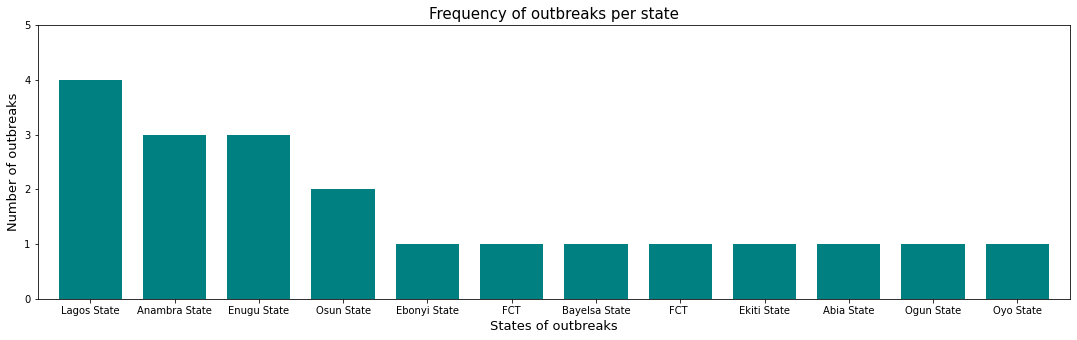

In [101]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.1, 2.39, 0.95])
axes.set_xlabel('States of outbreaks', fontsize=13)
axes.set_ylabel('Number of outbreaks', fontsize=13)
axes.set_title('Frequency of outbreaks per state', fontsize=15)
states_with_outbreaks = df['State'].value_counts()
states_with_outbreaks.plot(kind='bar', x='State' , color='teal', ylim=(0,5), width=0.75)
fig.autofmt_xdate(rotation=0,ha='center')

In [66]:
#### In which type of market did fires break out most?

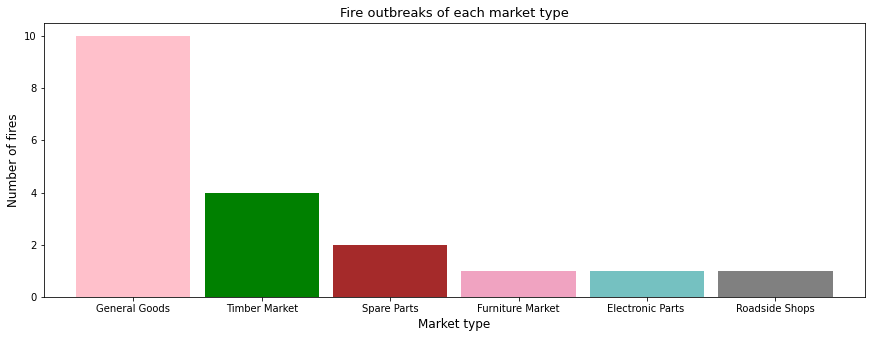

In [118]:
fig = plt.figure()
axes = fig.add_axes([0.6,0.1,1.9,0.95])
axes.set_title('Fire outbreaks of each market type', fontsize=13)

axes.set_xlabel('Market type', fontsize=12)
axes.set_ylabel('Number of fires', fontsize=12)

market_type = df['Type of Market']
market_type.value_counts().plot(kind='bar', 
                                  color=['pink','green','brown',(0.9, 0.4, 0.6, 0.6),(0.1, 0.6, 0.6, 0.6),'grey','orange'], width=0.89)

fig.autofmt_xdate(rotation=0,ha='center')

In [68]:
#### What was the most reported cause of fire?

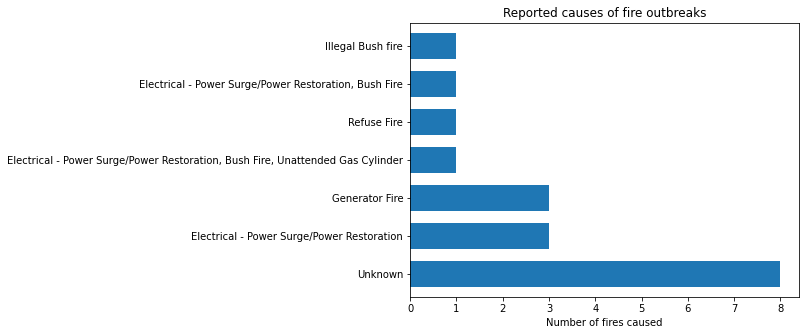

In [108]:
fig =plt.figure()
axes = fig.add_axes([4.9,.1, 0.9,0.95])
axes.set_xlabel('Number of fires caused')
axes.set_title('Reported causes of fire outbreaks')
reported_causes = df['Reported Causes'].value_counts()
reported_causes.plot(kind='barh', x='Reported Causes', width=0.7)


In [70]:
#### How many markets experienced recurring outbreaks?

In [71]:
recurring_outbreaks_count = df['Recurring?'].eq('Yes')
recurring_outbreaks_count.sum()

4

In [72]:
recurring_outbreaks_df = df[recurring_outbreaks_count]
recurring_outbreaks_df['Market Name'].unique()

array(['Timber section Industrial Market Umuahia',
       'Kugbo Furniture Market', 'Balogun Market ', 'Mile 12 Market'],
      dtype=object)

In [73]:
#### Which state had the most recurring outbreaks?

In [74]:
recurring_outbreaks_df['State'].value_counts()

Lagos State    2
Abia State     1
FCT            1
Name: State, dtype: int64

In [75]:
#### How many newspaper companies carried the news of recent fire outbreaks?

In [76]:
df['Src'].nunique()

19

In [77]:
all_sources = np.concatenate((df['Src'], df['Recurring src']))
all_sources = pd.Series(all_sources)
all_sources.nunique()

22

In [78]:
#### Which newspaper(s) can be said to be more reliable for news on fire outbreaks?

In [79]:
all_sources.value_counts()
all_sources.mode()

0    https://www.pulse.ng/news/local/in-lagos-2-dea...
dtype: object

In [80]:
#### Just how important are fire fighters in controlling and quenching market fires?

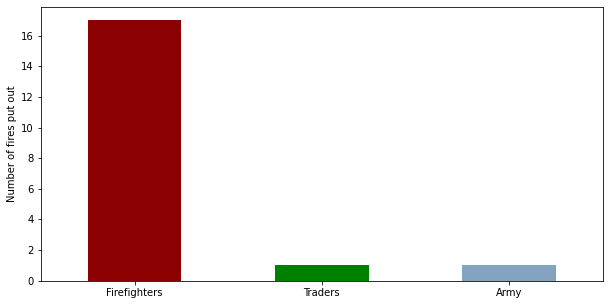

In [109]:
fig = plt.figure()
axes = fig.add_axes([0.6,0.1,1.3,0.95])
axes.set_ylabel('Number of fires put out')

fire_stoppers = df['Fire put out by']
fire_stoppers.value_counts().plot(kind='bar', color=['darkred','green',(0.2, 0.4, 0.6, 0.6)])

fig.autofmt_xdate(rotation=0,ha='center')

In [82]:
#### Which market fire had fatalities?

In [83]:
fatalities = df[df['Fatalities'].eq('Yes')]
fatalities.head()

,Date of Fire,Market Name,Src,State,Region,Type of Market,LGA,Actual Start Location,Fire put out by,Fatalities,Looting,Reported Causes,Recurring?,When,Recurring src,Estimated Loss (N),Effective Use of Fire Extinguishers
5,2020-01-05,Akesan Market,https://guardian.ng/news/traders-count-losses-...,Oyo State,South-West,General Goods,Oyo East LGA,Unspecified,Firefighters,Yes,Yes,Unknown,No,N/a,NaN,"20,000,000,000.00",No


In [84]:
#### Which month had the most fire outbreaks?

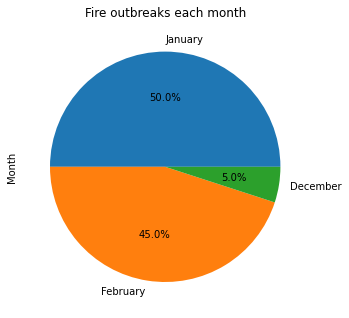

In [117]:
fig = plt.figure()
axes = fig.add_axes([0.6,0.1,1,1.])
axes.set_title('Fire outbreaks each month')

df['Month'] = df['Date of Fire'].dt.month_name()
df['Month'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [86]:
#### Do the citizens need more enlightenment on the use of extinguishers?

In [87]:
(df['Effective Use of Fire Extinguishers'].eq('Yes')).value_counts()

False    19
True      1
Name: Effective Use of Fire Extinguishers, dtype: int64

## Conclusions
+ Lagos had the most fire outbreaks.
+ Four markets have had recurring outbreaks.
+ Two recurring fire outbreaks have been recorded in Lagos.
+ Not many fatalities were recorded.
+ Punch.ng is most reliable for news on fire outbreaks.
+ Firefighters were crucial in controlling and stopping fires.
+ Most of the market fires in 2020 occurred in January.

#### Possible solutions
+ Citizens need to be enlightened on the use of fire extinguishers and other control methods.
+ To reduce fatality, firefighters should be contacted as early as possible.